# Packages :

In [2]:
# loading the needed packages

import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

D:\New folder (2)\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Dataset :

In [3]:
# loading the dataset
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()



y = 1. It's a cat picture.


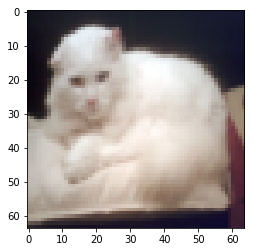

In [4]:
# Example of a picture
index = 13
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [8]:
# About dataset

train_no=train_x_orig.shape[0]
test_no=test_x_orig.shape[0]
img_size=train_x_orig.shape[1]

print("No of training examples : "+ str(train_no))
print("No of test examples : "+ str(test_no))
print("Size of each image : "+"(" +str(img_size)+"," + str(img_size)+",3)" )

No of training examples : 209
No of test examples : 50
Size of each image : (64,64,3)


In [9]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data 
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


# Model :

In [40]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.009, num_iterations = 3000, print_cost=False):
    
    costs=[]
    
    parameters=initialize_parameters(layers_dims)
    
    for i in range(0,num_iterations):
        
        AL,caches=L_model_forward(X,parameters)
        
        cost=compute_cost(AL,Y)
        
        grads=L_model_backward(AL,Y,caches)
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
        
    # plot the cost vs iterations graph
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("cost vs iterations"+"("+"learning rate : "+str(learning_rate)+")")
    plt.show()
    
    return parameters

Cost after iteration 0: 0.695971
Cost after iteration 100: 0.621534
Cost after iteration 200: 0.522557
Cost after iteration 300: 0.521224
Cost after iteration 400: 0.473426
Cost after iteration 500: 0.438644
Cost after iteration 600: 0.390816
Cost after iteration 700: 0.343460
Cost after iteration 800: 0.367260
Cost after iteration 900: 0.243441
Cost after iteration 1000: 0.208688
Cost after iteration 1100: 0.060056
Cost after iteration 1200: 0.042010
Cost after iteration 1300: 0.031697
Cost after iteration 1400: 0.023901
Cost after iteration 1500: 0.014829
Cost after iteration 1600: 0.011310
Cost after iteration 1700: 0.009015
Cost after iteration 1800: 0.007413
Cost after iteration 1900: 0.006249
Cost after iteration 2000: 0.005355
Cost after iteration 2100: 0.004661
Cost after iteration 2200: 0.004107
Cost after iteration 2300: 0.003656
Cost after iteration 2400: 0.003287


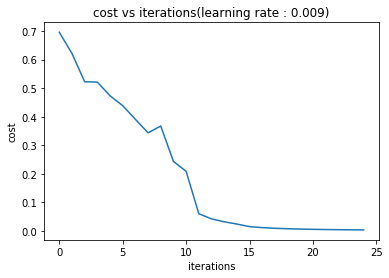

In [41]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [42]:
train_prediction=predict(train_x,train_y,parameters)

Accuracy: 0.9999999999999998


In [43]:
test_prediction=predict(test_x,test_y,parameters)

Accuracy: 0.74


As it can be seen, the model performs very well on the training set but not that well on the test set. Thus, it seems to be overfitting the data, application of regularisation can further enhance the test performance.